In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices

from scoringFunctions import scoreChoices
from scoringFunctions import scoreChoicesUnfiltered
from scoringFunctions import scorePerPhase

from analysisFunctions import testRTbasedOnPhaseScoring

from rtDistFunctions import computeDensityPerPhase

from plottingFunctions import plotIt

In [5]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

#%% LOAD IN DATA
Adat,Mdat = loadData()

In [7]:
#%% PREPROCESS DATA (get sides and choices)
choices, sides = preProcessChoices(Adat, Mdat)

In [8]:
# LOAD IN REACTION TIMES AND REMOVE CANCELLED AND TIMED OUT TRIALS
rt_raw = Adat.xs('reaction_time',level = 1, axis = 1)
rtChoicesFilter = rt_raw[~np.isnan(choices)]
rt = rtChoicesFilter[rtChoicesFilter > 100] #remove trials where researcher gave reward before sensors were crossed 

In [9]:
# determine which trials were correct and incorrect come from sensor scores only
correct, incorrect, nTotalTrials = scoreChoicesUnfiltered(choices, sides)

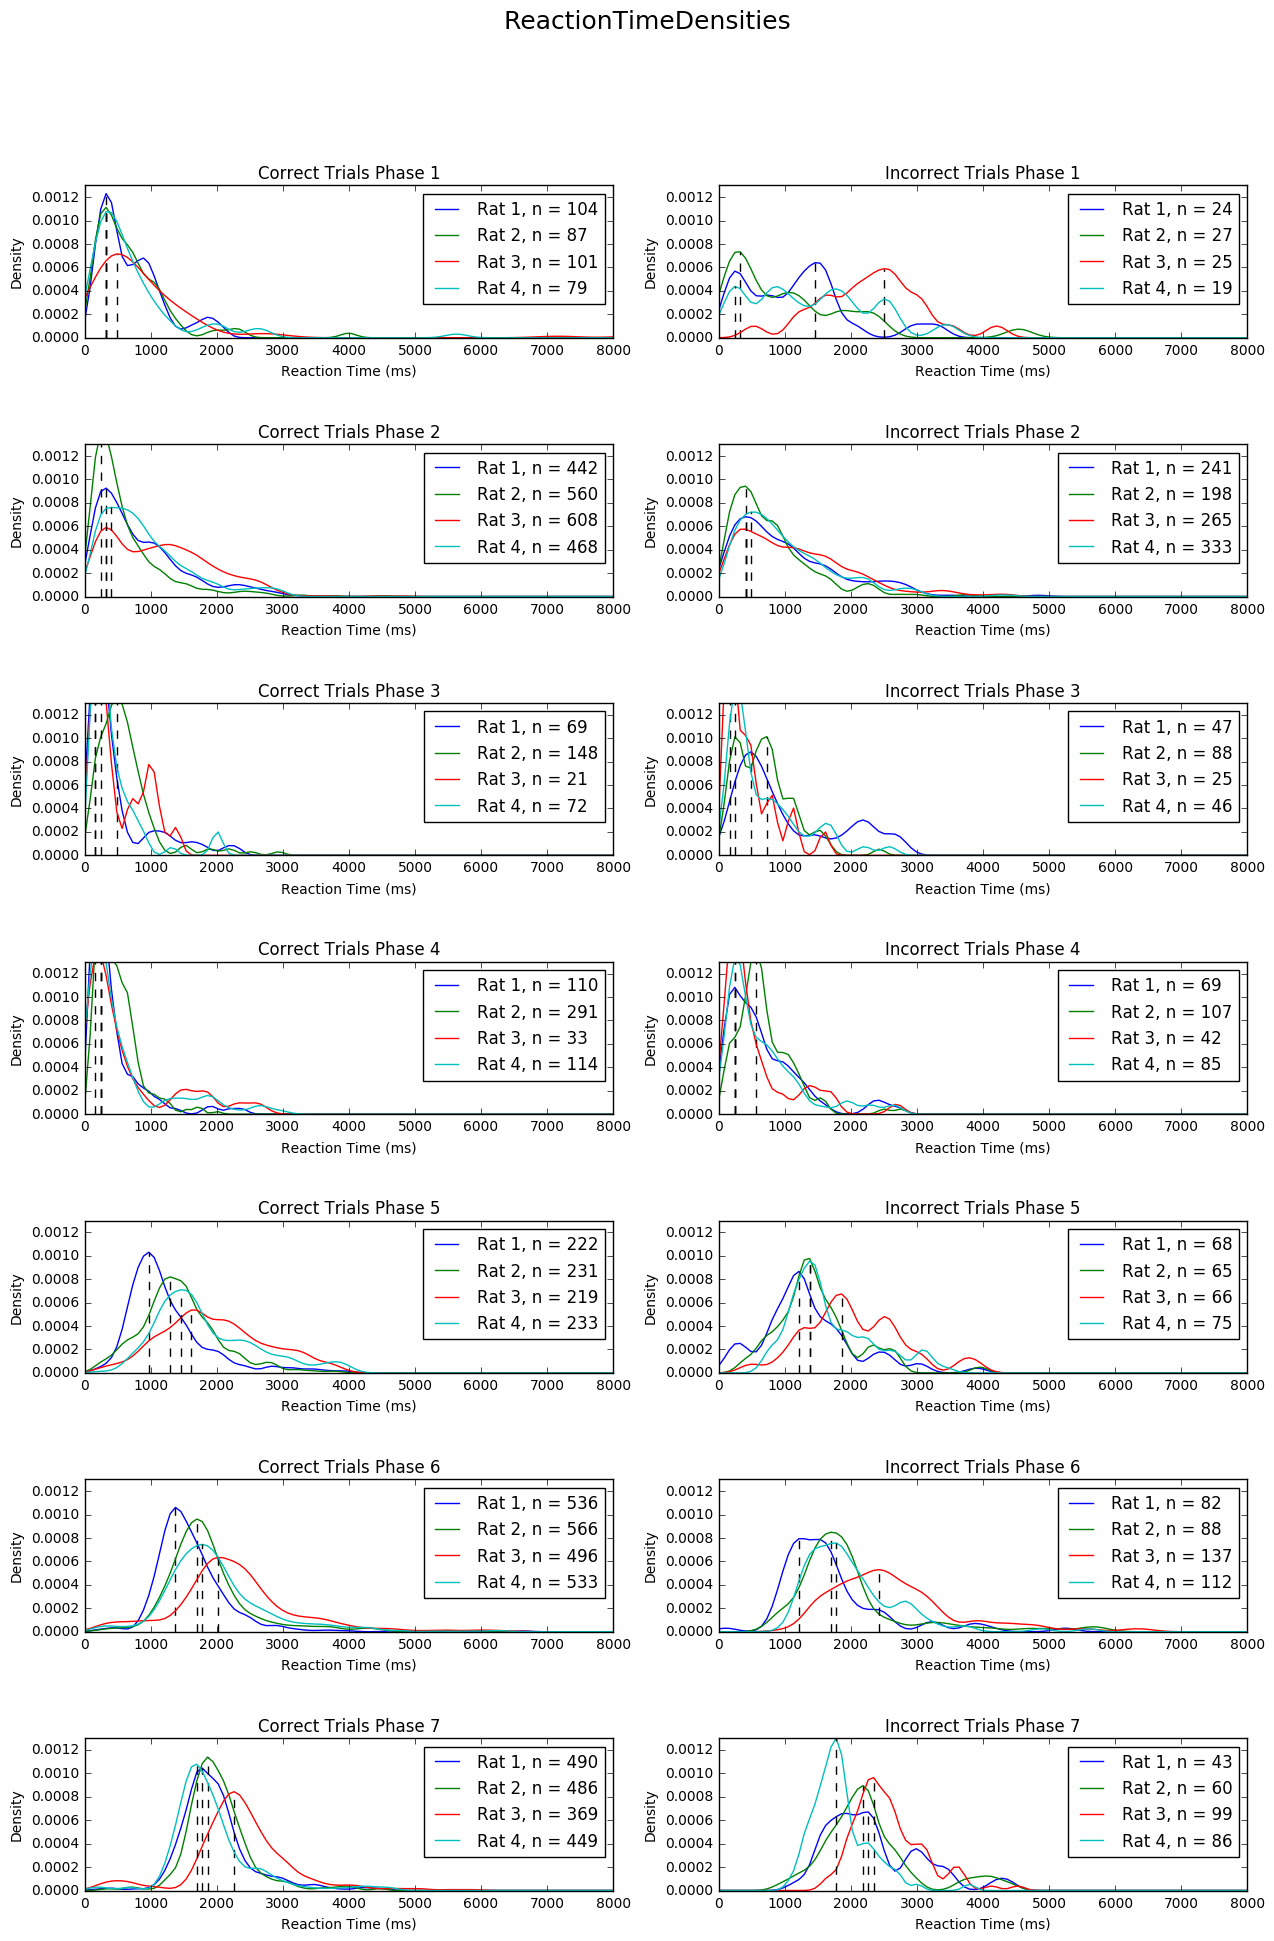

In [10]:
computeDensityPerPhase(rt, correct, incorrect)